## Important the code below before you run everything else, since most of the challenges will require it: 


In [1]:
import requests
def send_request(url): 
    response = requests.get(url)

    if(response.status_code == 200): 
        data = response.json()
        return data

    print(response.status_code)
    return None 


# HOW AES WORKS

### Keyed permutations 
[Bijection](https://en.wikipedia.org/wiki/Bijection)

### Resisting Bruteforce 
[Biclique attack](https://en.wikipedia.org/wiki/Biclique_attack)

### Structure of AES

In [1]:
def bytes2matrix(text):
    """ Converts a 16-byte array into a 4x4 matrix.  """
    return [list(text[i:i+4]) for i in range(0, len(text), 4)]

def matrix2bytes(matrix):
    return ''.join(chr(m) for row in matrix for m in row)
    
matrix = [
    [99, 114, 121, 112],
    [116, 111, 123, 105],
    [110, 109, 97, 116],
    [114, 105, 120, 125],
]


print(matrix2bytes(matrix))

crypto{inmatrix}


### Round Keys

In [118]:
state = [
    [206, 243, 61, 34],
    [171, 11, 93, 31],
    [16, 200, 91, 108],
    [150, 3, 194, 51],
]

round_key = [
    [173, 129, 68, 82],
    [223, 100, 38, 109],
    [32, 189, 53, 8],
    [253, 48, 187, 78],
]

import numpy as np 
def add_round_key(s, k):
    for i in range(4):
        for j in range(4):
            s[i][j]^=k[i][j]

    return s


print(matrix2bytes(add_round_key(state, round_key)))

crypto{r0undk3y}


### Confusion through Substitution

The fast lookup in an S-Box is a shortcut for performing a very nonlinear function on the input bytes. This function involves taking the modular inverse in the Galois field $2^8$ and then applying an affine transformation which has been tweaked for maximum "confusion"

Simplest way to express the function is trough the following high-degre polynomial: 
$f(x) = 05x^{fe} + 09x^{fd} + f9x^{fb} + 25x^{f7} + f4x^{ef} + 01x^{df} + b5x^{bf} + 8fx^{7f} + 63$

To make the S-Box, the function has been calculated on all input values from <code>0x00</code> to <code>0xff</code> and the outputs put in the lookup table


In [153]:
s_box = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

inv_s_box = (
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D,
)

state = [
    [251, 64, 182, 81],
    [146, 168, 33, 80],
    [199, 159, 195, 24],
    [64, 80, 182, 255],
]


def sub_bytes(s, sbox=s_box):
    return np.array(sbox)[np.array(s)]



print(matrix2bytes(sub_bytes(state, sbox=inv_s_box)))

crypto{l1n34rly}


### Diffusion through Permutation

Shannon diffusion
Every part of a cipher's input should spread to every part of the output. 
Without diffusion , the same byte in the same position would get the same transformation applied to it each round, this would allow attacks on each byte position in the state matrix separately. 
Substitution needs to scramble the state (invertibly) so that substitution applied on one byte influence all other bytes in the state 
An ideal ammount of diffusion causes a change of one bit in the plaintext to lead change in half the bits of the ciphertext - Avalanche effect 

This is why we have ShiftRows and MixColumns, every byte affects every other byte in the state with just two rounds. 
First row is the same, second row is shifted over one column to the left, wrapping around, third row is shifted two columns, the fourth row by three 
This is to avoid the columns being encrypted idependently, in which case AES is degenerated into four independent block ciphers 
Mix Columns is Matrix multiplication in Rijndael's Galois field between the columns of the state and a preset matrix, each byte of each column therefore affects all the bytes of the resulting column

In [4]:
def shift_rows(s):
    s[0][1], s[1][1], s[2][1], s[3][1] = s[1][1], s[2][1], s[3][1], s[0][1]
    s[0][2], s[1][2], s[2][2], s[3][2] = s[2][2], s[3][2], s[0][2], s[1][2]
    s[0][3], s[1][3], s[2][3], s[3][3] = s[3][3], s[0][3], s[1][3], s[2][3]


def inv_shift_rows(s):
    s[1][1], s[2][1], s[3][1], s[0][1] = s[0][1], s[1][1], s[2][1], s[3][1] 
    s[2][2], s[3][2], s[0][2], s[1][2] = s[0][2], s[1][2], s[2][2], s[3][2] 
    s[3][3], s[0][3], s[1][3], s[2][3] = s[0][3], s[1][3], s[2][3], s[3][3]  


# learned from http://cs.ucsb.edu/~koc/cs178/projects/JT/aes.c
xtime = lambda a: (((a << 1) ^ 0x1B) & 0xFF) if (a & 0x80) else (a << 1)


def mix_single_column(a):
    # see Sec 4.1.2 in The Design of Rijndael
    t = a[0] ^ a[1] ^ a[2] ^ a[3]
    u = a[0]
    a[0] ^= t ^ xtime(a[0] ^ a[1])
    a[1] ^= t ^ xtime(a[1] ^ a[2])
    a[2] ^= t ^ xtime(a[2] ^ a[3])
    a[3] ^= t ^ xtime(a[3] ^ u)


def mix_columns(s):
    for i in range(4):
        mix_single_column(s[i])


def inv_mix_columns(s):
    # see Sec 4.1.3 in The Design of Rijndael
    for i in range(4):
        u = xtime(xtime(s[i][0] ^ s[i][2]))
        v = xtime(xtime(s[i][1] ^ s[i][3]))
        s[i][0] ^= u
        s[i][1] ^= v
        s[i][2] ^= u
        s[i][3] ^= v

    mix_columns(s)


state = [
    [108, 106, 71, 86],
    [96, 62, 38, 72],
    [42, 184, 92, 209],
    [94, 79, 8, 54],
]

inv_mix_columns(state)
inv_shift_rows(state)

print(matrix2bytes(state))

crypto{d1ffUs3R}


### Bringing It All Together

In [157]:
N_ROUNDS = 10

key        = b'\xc3,\\\xa6\xb5\x80^\x0c\xdb\x8d\xa5z*\xb6\xfe\\'
ciphertext = b'\xd1O\x14j\xa4+O\xb6\xa1\xc4\x08B)\x8f\x12\xdd'



def expand_key(master_key):
    """
    Expands and returns a list of key matrices for the given master_key.
    """

    # Round constants https://en.wikipedia.org/wiki/AES_key_schedule#Round_constants
    r_con = (
        0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
        0x80, 0x1B, 0x36, 0x6C, 0xD8, 0xAB, 0x4D, 0x9A,
        0x2F, 0x5E, 0xBC, 0x63, 0xC6, 0x97, 0x35, 0x6A,
        0xD4, 0xB3, 0x7D, 0xFA, 0xEF, 0xC5, 0x91, 0x39,
    )

    # Initialize round keys with raw key material.
    key_columns = bytes2matrix(master_key)
    iteration_size = len(master_key) // 4

    # Each iteration has exactly as many columns as the key material.
    i = 1
    while len(key_columns) < (N_ROUNDS + 1) * 4:
        # Copy previous word.
        word = list(key_columns[-1])

        # Perform schedule_core once every "row".
        if len(key_columns) % iteration_size == 0:
            # Circular shift.
            word.append(word.pop(0))
            # Map to S-BOX.
            word = [s_box[b] for b in word]
            # XOR with first byte of R-CON, since the others bytes of R-CON are 0.
            word[0] ^= r_con[i]
            i += 1
        elif len(master_key) == 32 and len(key_columns) % iteration_size == 4:
            # Run word through S-box in the fourth iteration when using a
            # 256-bit key.
            word = [s_box[b] for b in word]

        # XOR with equivalent word from previous iteration.
        
        word = bytes(i^j for i, j in zip(word, key_columns[-iteration_size]))
        key_columns.append(word)
    # Group key words in 4x4 byte matrices.
    return [key_columns[4*i : 4*(i+1)] for i in range(len(key_columns) // 4)]

def inv_sub_bytes(s):
    for i in range(4): 
        for j in range(4): 
            s[i][j] = inv_s_box[s[i][j]] 

def decrypt(key, ciphertext):
    round_keys = expand_key(key) # Remember to start from the last round key and work backwards through them when decrypting
  
    # Convert ciphertext to state matrix
    ciphertext = bytes2matrix(ciphertext)

    
     # Initial add round key step
    add_round_key(ciphertext,round_keys[10])
   
    
    for i in range(N_ROUNDS - 1, 0, -1):
       
        inv_shift_rows(ciphertext)
     
        inv_sub_bytes(ciphertext)
         
        add_round_key(ciphertext,round_keys[i])
        inv_mix_columns(ciphertext)
      
      
    # Run final round (skips the InvMixColumns step)
    inv_shift_rows(ciphertext)
    inv_sub_bytes(ciphertext)
    add_round_key(ciphertext,round_keys[0])
   
    # Convert state matrix to plaintext
    plaintext = matrix2bytes(ciphertext)
    return plaintext


print(decrypt(key, ciphertext))


crypto{MYAES128}


# SYMMETRIC STARTER

### Modes of Operation Starter

In [24]:
c = send_request('https://aes.cryptohack.org/block_cipher_starter/encrypt_flag/')['ciphertext']
p = send_request('https://aes.cryptohack.org/block_cipher_starter/decrypt/'+c+'/')['plaintext']

bytes.fromhex(p)

b'crypto{bl0ck_c1ph3r5_4r3_f457_!}'

### Passwords as keys

In [25]:
from Cryptodome.Cipher import AES
import hashlib
import random
import requests


c = 'c92b7734070205bdf6c0087a751466ec13ae15e6f1bcdd3f3a535ec0f4bbae66'


def decrypt(ciphertext, password_hash):
    ciphertext = bytes.fromhex(ciphertext)
    key = bytes.fromhex(password_hash)

    cipher = AES.new(key, AES.MODE_ECB)
    try:
        decrypted = cipher.decrypt(ciphertext)
    except ValueError as e:
        return {"error": str(e)}

    return {"plaintext": decrypted.hex()}


url = "https://gist.githubusercontent.com/wchargin/8927565/raw/d9783627c731268fb2935a731a618aa8e95cf465/words"

response = requests.get(url)

if response.status_code == 200:
    words = [line.strip() for line in response.text.splitlines()]

for i in range(len(words)): 
    hash = hashlib.md5(words[i].encode()).digest()
    plaintext = decrypt(c,hash.hex())
    plaintext = bytes.fromhex(plaintext["plaintext"])
  
    if b'crypto' in plaintext: 
        print(plaintext.decode('ascii'))
        break 


crypto{k3y5__r__n07__p455w0rdz?}


# BLOCK CIPHERS

### ECB Oracle

In [27]:

from IPython.display import clear_output
import binascii
def str2hex(s):

    return binascii.hexlify(s.encode()).decode()



a = ''
f = ''
letters = [ord('a') + i for i in range(26)]
nums = [ord('0') + i for i in range(10)]
dict = letters+nums + [ord('}'),ord('_'),ord('{')]
for k in range(2): 
    p = ''
    for i in range(16,0,-1): 
        if(i!=1):
            t = (2*i-2)*'a'
        else: 
            t =" "


        url ="https://aes.cryptohack.org/ecb_oracle/encrypt/"+t+k*str2hex(a)+"/"
        c = send_request(url)['ciphertext']

        for d in dict: 

            url = "https://aes.cryptohack.org/ecb_oracle/encrypt/"+t+k*str2hex(a)+str2hex(p)+hex(d)[2:]+"/"

            forgery = send_request(url)['ciphertext']
            
            if forgery[32*k:32*(k+1)]==c[2*k*32:(2*k+1)*32]: 
                p+=chr(d)
                print(a+p)
                break 
        
        if '}' in p: 
            break 
    f+=p 
    a = p 
    
clear_output()
print(f)

crypto{p3n6u1n5_h473_3cb}


### ECB CBC WTF

 So we get from CBC mode encryption
 
 $ c_0 = AES(k,IV \oplus m_0)$ 

 $ c_1 = AES(k,c_0 \oplus m_1)$ 

 $ c_2 = AES(K,c_1 \oplus m_2)$ 

And from ECB decryption 

$ m_0' = AES^{-1}(k,c_0) = AES{^-1}(k,IV \oplus m_0) = IV \oplus m_0 $

$ m_1' = AES^{-1}(k,c_1) = AES{^-1}(k,c_0 \oplus m_1) = c_0 \oplus m_1 $

$ m_2' = AES^{-1}(k,c_2) = AES{^-1}(k,c_1 \oplus m_2) = c_1 \oplus m_2 $ 

$ => m_1 = m_1' \oplus c_0  $ and $ m_2 = m_2' \oplus c_1 $ and that's enough to recover our flag

In [28]:
def xor(h1,h2): 
    return hex(int(h1,16)^int(h2,16))[2:]



url = "https://aes.cryptohack.org/ecbcbcwtf/encrypt_flag/"
c = send_request(url)['ciphertext']


url = "https://aes.cryptohack.org/ecbcbcwtf/decrypt/"+c+"/"

m = send_request(url)['plaintext']

FLAG = bytes.fromhex(xor(c[0:32],m[32:64])+xor(c[32:64],m[64:96]))
print(FLAG)

b'crypto{3cb_5uck5_4v01d_17_!!!!!}'


### Flipping cookie

In [29]:
def xor(x,y):
    return bytes([a ^ b for a, b in zip(x,y)])

def pad(text): 
    return text + text[:16-len(text)]

url = 'https://aes.cryptohack.org/flipping_cookie/get_cookie/'

cookie = send_request(url)['cookie']


IV = cookie[0:32]
IV = bytes.fromhex(IV)

pt = 'admin=False;'
pt = pad(pt).encode()

forgery = 'admin=True;'
forgery = pad(forgery).encode()

IV_forgery = xor(xor(IV,pt),forgery).hex()

url = 'https://aes.cryptohack.org/flipping_cookie/check_admin/'+cookie[32:]+'/'+IV_forgery+'/'

FLAG = send_request(url)['flag']

FLAG


'crypto{4u7h3n71c4710n_15_3553n714l}'

### Lazy CBC

Main idea:

Since we now have k = IV

$m_0 = D(k,c_0) \oplus k$

$m_1 = D(k,c_1) \oplus c_0$

We somehow need to obtain $D(k,c_0)$ and xor it with $m_0$

So we make a forgery where $c_0 = 0$ and $c_1=c_0$

$m_1 = D(k,c_1) \oplus c_0 = D(k,c_0) \oplus 0 = D(k,c_0) $

In [56]:
def xor(x,y):
    x = bytes.fromhex(x)
    y = bytes.fromhex(y)
    return bytes([a ^ b for a, b in zip(x,y)])

m0_m1 = 'd'*32+'e'*32

url = 'https://aes.cryptohack.org/lazy_cbc/encrypt/'+m0_m1+'/'

c = send_request(url)['ciphertext']

c0 = c[0:32]
c1 = c[32:]

forgery = '0'*32 + c0

url = 'https://aes.cryptohack.org/lazy_cbc/receive/'+forgery+'/'

d_0 = send_request(url)['error']
d_0 = d_0.split(': ')[1][32:]

k = xor(d_0,m0_m1[0:32]).hex()

url = 'https://aes.cryptohack.org/lazy_cbc/get_flag/'+k+'/'

FLAG = send_request(url)['plaintext']

bytes.fromhex(FLAG)

b'crypto{50m3_p30pl3_d0n7_7h1nk_IV_15_1mp0r74n7_?}'

### Triple DES

Visit: https://en.wikipedia.org/wiki/Weak_key

Take 3 weak keys of your choice k1,k2,k3 

Send them to encrypt flag, then, encrypt the flag again with k3,k2,k1

Basically because of the weak keys it will act as decryption and will decrypt your flag

p -> E(k1,.) -> D(k2,.) -> E(k3,.) -> c 
c -> D(k3,.) -> D(k2,.) -> E(k1,.) -> p 

In [90]:
k1 = '0101010101010101'
k2 = 'FEFEFEFEFEFEFEFE'
k3 = 'E0E0E0E0F1F1F1F1'

url = 'https://aes.cryptohack.org/triple_des/encrypt_flag/'+k1+k2+k3+'/'

c_flag = send_request(url)['ciphertext']

url = 'https://aes.cryptohack.org/triple_des/encrypt/'+k3+k2+k1+'/'+c_flag+'/'

FLAG = send_request(url)['ciphertext']

str(bytes.fromhex(FLAG)).split('\\')[0]


"b'crypto{n0t_4ll_k3ys_4r3_g00d_k3ys}"

# STREAM CIPHERS

### Symmetry

Idea:
 
We obtain IV when encrypting flag

After that we send forgery (IV|IV|IV,IV) 

$c_0 = IV_0 \oplus E(k,IV) $ 

$c_1 = IV_1 \oplus E(k,c_0) $

$c_2 = IV_2 \oplus E(k,c_1) $

We can know obtain $ E(k,IV), E(k,c_0),  E(k,c_1) $

Since each one of these values were used when Flag was encrypted, namely:

$c'_0 = m_0 \oplus E(k,IV) $ 

$c'_1 = m_1 \oplus E(k,c_0) $

$c'_2 = m_2 \oplus E(k,c_1) $

We can now xor them into the original ciphertext and recieve our flag

In [23]:
def xor(x,y):
    x = bytes.fromhex(x)
    y = bytes.fromhex(y)
    return bytes([a ^ b for a, b in zip(x,y)])

url = 'https://aes.cryptohack.org/symmetry/encrypt_flag/'

c = send_request(url)['ciphertext']

IV = c[0:32] 

BLOCKS = len(c)//32  

url = 'https://aes.cryptohack.org/symmetry/encrypt/'+ IV+IV+IV + '/' + IV +'/'

f = send_request(url)['ciphertext']

FLAG = ''
for i in range(BLOCKS-1): 
    E = xor(f[i*32:(i+1)*32],IV).hex()
    start = (i+1)*32 
    end = (i+2)*32 
    FLAG+=xor(E,c[start:end]).hex()


FLAG += xor(xor(f[32*(BLOCKS-1):],IV).hex(),c[32*BLOCKS:]).hex()

bytes.fromhex(FLAG)

b'crypto{0fb_15_5ymm37r1c4l_!!!11!}'

### Bean counter

Basically the counter initialization was set to false and it never went up

So everytime the encryption was done with $c_i = m_i \oplus E(k,n)$ where n is nonce 

All we need is $E(k,n)$ so we get it with first 16 bytes , the metadata of PNG image xorred with first 16 bytes of our ciphertext

<code> 89504E470D0A1A0A </code> - PNG signature

<code> 0000000D </code> - length field of the first IHDR chunk, it indicates it is 13 bytes (http://www.libpng.org/pub/png/spec/1.2/PNG-Chunks.html)
- Width:              4 bytes
- Height:             4 bytes
- Bit depth:          1 byte
- Color type:         1 byte
- Compression method: 1 byte
- Filter method:      1 byte
- Interlace method:   1 byte

<code> 49484452 </code> - ASCII of 'IHDR'

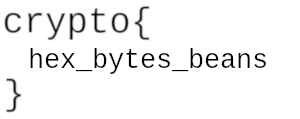

In [48]:
from PIL import Image 
import io 
from IPython.display import display 

c= send_request('https://aes.cryptohack.org/bean_counter/encrypt')['encrypted']


def xor(a, b):
    a = bytes.fromhex(a)
    b = bytes.fromhex(b)
    # xor 2 bytestrings, repeating the 2nd one if necessary
    return bytes(x ^ y for x,y in zip(a, b * (1 + len(a) // len(b))))


metadata = '89504E470D0A1A0A0000000D49484452'


E_Nonce = xor(c[0:32],metadata).hex() 

bytes_img = xor(c,E_Nonce)

image = Image.open(io.BytesIO(bytes_img)) 

display(image)

### CTRIME

The compression in algorithm basically when it sees 2 of the same values for letters it will remove one, you can use this to guess the flag.

So basically you concat the current flag value and the next guess, if the length stays the same, it means you've guessed the correct ASCII letter of plaintext 

Also the weird if clause, 'E' letter doesn't get compressed script just stopped, so you have to either re-run or do it like me, i mean you can see CRIM, it will clearly be CRIME 

In [71]:
import binascii
import string
from IPython.display import clear_output

def str2hex(s):

    return binascii.hexlify(s.encode()).decode()


flag ='crypto{'

URL ='https://aes.cryptohack.org/ctrime/encrypt/'+str2hex(flag)+'/'


l = len(send_request(URL)['ciphertext'])

dict = string.ascii_uppercase+ string.ascii_lowercase+''.join(str(i) for i in range(10))+'!'+'_'+'}'


while True: 
    for d in dict: 
        c_prime = send_request('https://aes.cryptohack.org/ctrime/encrypt/'+str2hex(flag+d)+'/')['ciphertext']
        
        if l == len(c_prime) or 'M' in flag and d =='E' and 'E' not in flag:
            l = len(c_prime)       
            flag+=d 
            print(flag)
            break 
            
        
    if '}' in flag: 
        break 

clear_output()
flag


'crypto{CRIME_571ll_p4y5}'

### Logon Zero